## Gradiente descendente

In [1]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
data = pd.DataFrame(data={"Precio": [100,150,230,255,300,290,310,295,315,298,294],
                          "Metros": [490,600,650,800,900,1100,1400,1600,1800,1900,2200],
                          "Habitaciones": [1,2,1,3,3,4,3,3,2,4,4]})

y = data.Precio
X = data[['Metros', 'Habitaciones']]
X

,Metros,Habitaciones
0,490,1
1,600,2
2,650,1
3,800,3
4,900,3
5,1100,4
6,1400,3
7,1600,3
8,1800,2
9,1900,4


En nuestro anterior calse la actualización de los coeficiente la haciamos aleatoriamente entre un rango de valores definidos por el parámetro *learning_rate*. 

En el caso de algoritmo de gradiente descendente esta actualización se realiza usando la derivada parcial de la función de coste, que a la vez depende de la hipotesis.

Base a crear una clase BaseEstimator que nos sirva como base de diferentes estimadores

In [14]:
import numpy as np
import random
import sys

class BaseRegresionLineal:
    
    def __init__(self, learning_rate=100, fit_intercept=False):
        '''
        Inicialización del modelo.
        Parametros:
          - learning_rate: define el desplazamiento máximo sobre los pesos en cada iteración.
        '''
        self.learning_rate = learning_rate
        self.fit_intercept = fit_intercept
        self.w = None
        self.num_attr = None
       
    
    def _H(self, X, w):
        '''
        Establece la hipótesis de la regresión lineal. Devuelve la evaluación de dicha hipótesis.
        '''
        if len(X.shape) > 1:
            return np.sum(X*np.array(w), axis=1)
        else:
            return X*np.array(w)

    def _J(self, X, Y, w):
        '''
        Establece la función de coste y devuelve la evaluación de dicha función de coste
        '''
        return (0.5 / X.shape[0]) * sum((self._H(X, w) - y) ** 2)
    
    def _update(self, X, y, current_w):
        raise Exception("Not implemented")

    def fit(self, X, y, num_iter=100, verbose=True, plot=False):
        '''
        Lleva a cabo la búsqueda de los mejores pesos dado los datos de entrada X y la 
        variable respuesta y.
        Parámetros:
          - X: datos de entrada en formato de tabla. Cada fila corresponde a una muestra y cada columna a un atributo.
          - y: variable de respuesta. Debe contener tantos elementos como filas tiene la entrada.
          - num_iter: número de iteraciones que queremos ejecutar de algoritmo de búsqueda.
          - verbose: si es True imprimirá por pantalla mensajes sobre el progreso
          - plot: si es True mostrará un gráfico de la línea de regresión. Solo en el caso de tener un solo atributo.
        '''
        
        # Comprobamos que el número de filas de la entrada corresponde con el número 
        # de elementos de la variable de respuesta
        if len(X) != len(y):
            raise Exception("El número de filas de X y el número de elemento en y no se corresponden.")

        if type(X) is pd.DataFrame:
            X = X.values
        
        if len(X.shape) == 1:
            X = X.reshape(X.shape[0],1)

        # Si se quiere ajustar la intercepción debemos introducir un nuevo atributo ficticio
        if self.fit_intercept:
            X = np.hstack((X, np.array([1.] * X.shape[0]
                                      ).reshape(X.shape[0],1)))
        
            
        # Usaremos esta lista para guardar el progreso del ajuste
        self.history = []

        # Establecemos el valor del coste al inicio lo mayor posible    
        j_min = float("inf")
        
        # Inicializamos los pesos
        self.num_attr = 1 if len(X.shape) == 1 else X.shape[1]
        self.w = [.0] * self.num_attr
        current_w = [.0] * self.num_attr
            
        for it in range(0,num_iter):
            # actualizamos los pesos aplicando el desfase de los pesos
            current_w = self._update(X, y, current_w)
            
            # calculamos el coste con los nuevos pesos
            j = self._J(X, y, current_w)

            # si encontramos mejora, actualizamos el los pesos del modelo y guardamos 
            # la mejora en el histórico
            if j < j_min:
                if verbose:
                    print ("Mejora: %f (%s)" % (j, current_w))
                    
                j_min = j
                self.w = current_w[:]
                self.history.append(current_w[:])

        # si se ha pedido mostrar el gráfico del progreso y tenemos un solo atributo 
        # pintamos las rectas encontradas      
        if plot and (self.num_attr == 1 or self.num_attr == 2 and self.fit_intercept):
            axes = plt.gca()
            axes.set_ylim([min(0, y.min() - y.std()), y.max() + y.std()])
            axes.set_xlim([min(0, X.min() - X.std()), X.max() + X.std()])
            
            for i, w in enumerate(self.history[:-1]):
                X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
                if self.fit_intercept:
                    X_plot = np.hstack((X_plot.reshape(X_plot.shape[0],1), 
                                        np.array([1.] * X_plot.shape[0]).reshape(X_plot.shape[0],1)))
                    
                gray = 1-i/(len(self.history)-1)
                plt.plot(X_plot, self._H(X_plot, w), '-', color=str(gray))


            # Add correlation line
            X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
            if self.fit_intercept:
                X_plot = np.hstack((X_plot.reshape(X_plot.shape[0],1), 
                                    np.array([1.] * X_plot.shape[0]).reshape(X_plot.shape[0],1)))

            plt.plot(X_plot, self._H(X_plot, self.w), '-', linewidth=2)

            if self.fit_intercept:
                plt.scatter(X[:, :-1], y, marker='+', color='r', s=200)
            else:
                plt.scatter(X, y, marker='+', color='r', s=200)

            
            plt.show()
            
        print ("Mejor solución: %f (%s)" % (j_min, self.w))
            
    def predict(self, X):
        '''
        Realiza la predicción para los datos de entrada X
        '''
        if self.w is None:
            raise Exception("El modelo no ha sido ajustado")
            
        return self._H(X, self.w)
    


Ahora nos podemos crear una especificación para la búsqueda aleatoria

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:58: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Mejora: 19036.216758 ([0.32174286913777883, 0.591319283676363])
Mejora: 12356.044511 ([0.08718010247023056, 1.378726223851387])
Mejora: 3441.133546 ([0.16784178133978167, 1.8510196277482045])
Mejora: 3416.439904 ([0.20775092917549376, 1.7578575339828262])
Mejora: 3298.328304 ([0.17334084761925617, 1.1400811699016045])
Mejora: 3159.995156 ([0.19657179608313213, 0.2219626411816129])
Mejora: 3111.344468 ([0.18976377211718276, 0.2342872545848227])


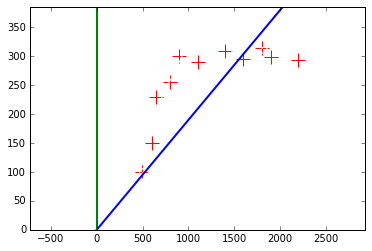

Mejor solución: 3111.344468 ([0.18976377211718276, 0.2342872545848227])


In [15]:
class RandomRegresionLineal(BaseRegresionLineal):
    
    def _update(self, X, y, current_w):
        for iattr in range(self.num_attr):
            current_w[iattr] = self.w[iattr] + random.uniform(-self.learning_rate,self.learning_rate)
        
        return current_w
reg = RandomRegresionLineal(learning_rate=1, fit_intercept=True)
reg.fit(X.Metros, data.Precio, num_iter=1000, plot=True)

Y para el gradiente descendente:

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:58: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Mejora: 10605775532226.357422 ([3425.0, 2.5790909090909095])


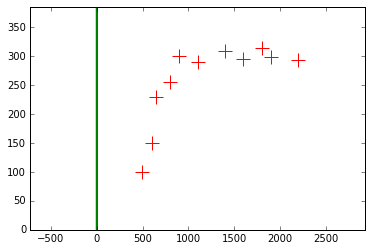

Mejor solución: 10605775532226.357422 ([3425.0, 2.5790909090909095])


In [16]:
class GDRegresionLineal(BaseRegresionLineal):
    
    def _update(self, X, y, current_w):
        for iattr in range(self.num_attr):
            current_w[iattr] = self.w[iattr] - (self.learning_rate * 
                            (np.dot(self._H(X, self.w) - y, X[:,iattr]) / X.shape[0]))

        return current_w
reg = GDRegresionLineal(learning_rate=0.01, fit_intercept=True)
reg.fit(X.Metros, data.Precio, num_iter=1000, plot=True) #siempre que sepamos que el algoritmo va a utilizar gradiente descendente es mejor normalizarlo.

No encuentra mejora. Esto es debido a que la actualización de los pesos ahora esta ligada a nuestras variables (recordamos que usamos la derivadas parciales de la función de coste). Esto implica, que con valores grandes en la variables se produciran grandes *saltos* durante la actualización de los coeficientes.

Podemos normalizar los datos entre 0 y 1 y de esta forma tenemos más controlados estas actualizaciones.

In [17]:
data['metros_norm'] = data.Metros / max(data.Metros)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:58: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


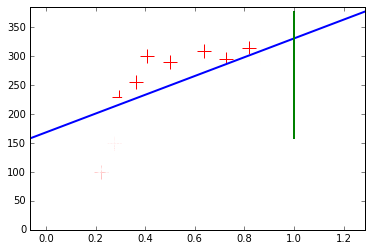

Mejor solución: 1130.919066 ([162.43922854103866, 168.51303851091785])


In [18]:
rlgd = GDRegresionLineal(learning_rate=0.01, fit_intercept=True)
rlgd.fit(data.metros_norm, data.Precio, num_iter=2000, plot=True, verbose=False)

In [19]:
import keras
keras.__version__

ImportError: No module named keras